## ML Project- 21MAT206

### Data Description

**Abstract**

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Data Characteristics**
    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.

**Summary Statistics** 

- Number of instances (observations): 1030
- Number of Attributes: 9
- Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
- Missing Attribute Values: None

| Variables                     |   Data Type  |    Measurement     |
|:------------------------------|:-------------|:-------------------|
| Cement                        | Quantitative | kg in a m3 mixture |
| Blast Furnace Slag            | Quantitative | kg in a m3 mixture |
| Fly Ash                       | Quantitative | kg in a m3 mixture |
| Water                         | Quantitative | kg in a m3 mixture |
| Superplasticizer              | Quantitative | kg in a m3 mixture |
| Coarse Aggregate              | Quantitative | kg in a m3 mixture |
| Fine Aggregate                | Quantitative | kg in a m3 mixture |
| Age                           | Quantitative | Day (1~365)        |
| Concrete compressive strength | Quantitative | MPa                |

### Installing required packages

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading the .csv file to Pandas dataframe

In [ ]:
df = pd.read_csv("Concrete_Data.csv")
df.shape # Shape of the data

(1030, 9)

In [3]:
df.sample(5) # Random sample of the data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
728,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,28,31.74
40,342.0,38.0,0.0,228.0,0.0,932.0,670.0,90,50.46
603,339.0,0.0,0.0,197.0,0.0,968.0,781.0,180,36.45
487,387.0,20.0,94.0,157.0,11.6,938.0,845.0,28,46.68
234,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,3,13.18


In [4]:
# No null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
round(df.describe(),1) # Basic statistical description of the data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0
mean,281.2,73.9,54.2,181.6,6.2,972.9,773.6,45.7,35.8
std,104.5,86.3,64.0,21.4,6.0,77.8,80.2,63.2,16.7
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.3
25%,192.4,0.0,0.0,164.9,0.0,932.0,731.0,7.0,23.7
50%,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.4
75%,350.0,143.0,118.3,192.0,10.2,1029.4,824.0,56.0,46.1
max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6


### Fitting a Linear Regression model to the complete data with all the predictors

In [6]:
# Multiple Linear Regression model
model1 = smf.ols(
'Concrete_Compressive_Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age',
data=df).fit()
print(model1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_Compressive_Strength   R-squared:                       0.616
Model:                                       OLS   Adj. R-squared:                  0.613
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Fri, 18 Aug 2023   Prob (F-statistic):          6.29e-206
Time:                                   18:56:13   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [7]:
# VIF for the predictors
vif_data = pd.DataFrame()
vif_data["Predictors"] = df.iloc[:,0:8].columns
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:,0:8].values, i) for i in range(len(df.iloc[:,0:8].columns))]
vif_data

,Predictors,VIF
0,Cement,15.456717
1,Blast_Furnace_Slag,3.329127
2,Fly_Ash,4.147833
3,Water,82.157569
4,Superplasticizer,5.471094
5,Coarse_Aggregate,84.955779
6,Fine_Aggregate,72.790995
7,Age,1.699459


<br> </br>
**A few observatons from the summary of the model with all predictors**

- For the model fitted with all the feautres, the standard error for the intercept $\beta_{0}$ is **26.586**, which is fairly high.
- The p-values for Fine_Aggregate and Coarse_Aggregate are **0.059**, **0.054** respectively, which are just above the accepted values.
- R squared, Adjusted R squared values are **0.616** and **0.613** respectively, explains the variability in response.
- F-statistic value is **204.3**, which is large enough to conclude the existence of relationship between predictors and response.
- VIF values show high collinearity between the predictors.
<br> </br>

### Fitting a Linear Regression model to the complete data with all the predictors but Fine Aggregate

In [8]:
# Multiple Linear Regression model
model2 = smf.ols(
'Concrete_Compressive_Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Age',
data=df).fit()
print(model2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_Compressive_Strength   R-squared:                       0.614
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     232.4
Date:                           Fri, 18 Aug 2023   Prob (F-statistic):          2.33e-206
Time:                                   18:56:13   Log-Likelihood:                -3870.8
No. Observations:                           1030   AIC:                             7758.
Df Residuals:                               1022   BIC:                             7797.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [9]:
# VIF for the predictors
vif_data = pd.DataFrame()
vif_data["Predictors"] = df.iloc[:,[0,1,2,3,4,5,7]].columns
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:,[0,1,2,3,4,5,7]].values, i) 
                   for i in range(len(df.iloc[:,[0,1,2,3,4,5,7]].columns))]
vif_data

,Predictors,VIF
0,Cement,14.497611
1,Blast_Furnace_Slag,3.047606
2,Fly_Ash,3.911835
3,Water,66.081624
4,Superplasticizer,4.087304
5,Coarse_Aggregate,56.751169
6,Age,1.673406


<br> </br>
**A few observatons from the summary of the new model with all predictors but Fine_Aggregate**

- The standard error for the intercept $\beta_{o}$ dropped from **26.586** to **8.842**, better approximation for $\beta_{o}$.
- The p-value for Coarse_Aggregate increased from **0.054** to **0.519**, shows the correlation with Fine_Aggregate.
- R squared value dropped from **0.616** to **0.614**, a factor is reduced number of predictors, also small decrease shows Fine_Aggregate didn't contribution towards the response as otherwise it would have dropped more.
- Adjusted R value dropped from **0.613** to **0.612**.
- F-statistic value increased from **204.3** to **232.4**, shows increased performance.
<br> </br>

### Fitting a Linear Regression model to the complete data with all the predictors but Fine Aggregate and Coarse Aggregate

In [10]:
# Multiple Linear Regression model
model3 = smf.ols('Concrete_Compressive_Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age',
                 data=df).fit()
print(model3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_Compressive_Strength   R-squared:                       0.614
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     271.2
Date:                           Fri, 18 Aug 2023   Prob (F-statistic):          1.67e-207
Time:                                   18:56:13   Log-Likelihood:                -3871.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1023   BIC:                             7790.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [11]:
# VIF for the predictors
vif_data = pd.DataFrame()
vif_data["Predictors"] = df.iloc[:,[0,1,2,3,4,7]].columns
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:,[0,1,2,3,4,7]].values, i) 
                   for i in range(len(df.iloc[:,[0,1,2,3,4,7]].columns))]
vif_data

,Predictors,VIF
0,Cement,14.231258
1,Blast_Furnace_Slag,3.022251
2,Fly_Ash,3.878135
3,Water,21.081884
4,Superplasticizer,3.844541
5,Age,1.657276


<br> </br>
**A few observatons from the summary of the model with all predictors but Fine_Aggregate and Coarse_Aggregate - Model 3**

- The standard error for the intercept $\beta_{o}$ dropped **8.842** to **4.213**, better approximation for $\beta_{o}$.
- The p-value for all the predictors is well below 0.05, shows all the feautres contribute towards response.
- R squared value remains **0.614**, no effect of dropping Coarse_Aggregate as the p-value was **0.519**, the estimated coefficient estimate is very close to zero hence non-contributing towards response.
- Adjusted R value remains **0.612**.
- F-statistic value increased from **232.4** to **271.2**, shows increased performance.
- Multicollinearity stills exists!
<br> </br>

### Basic visualization of the data

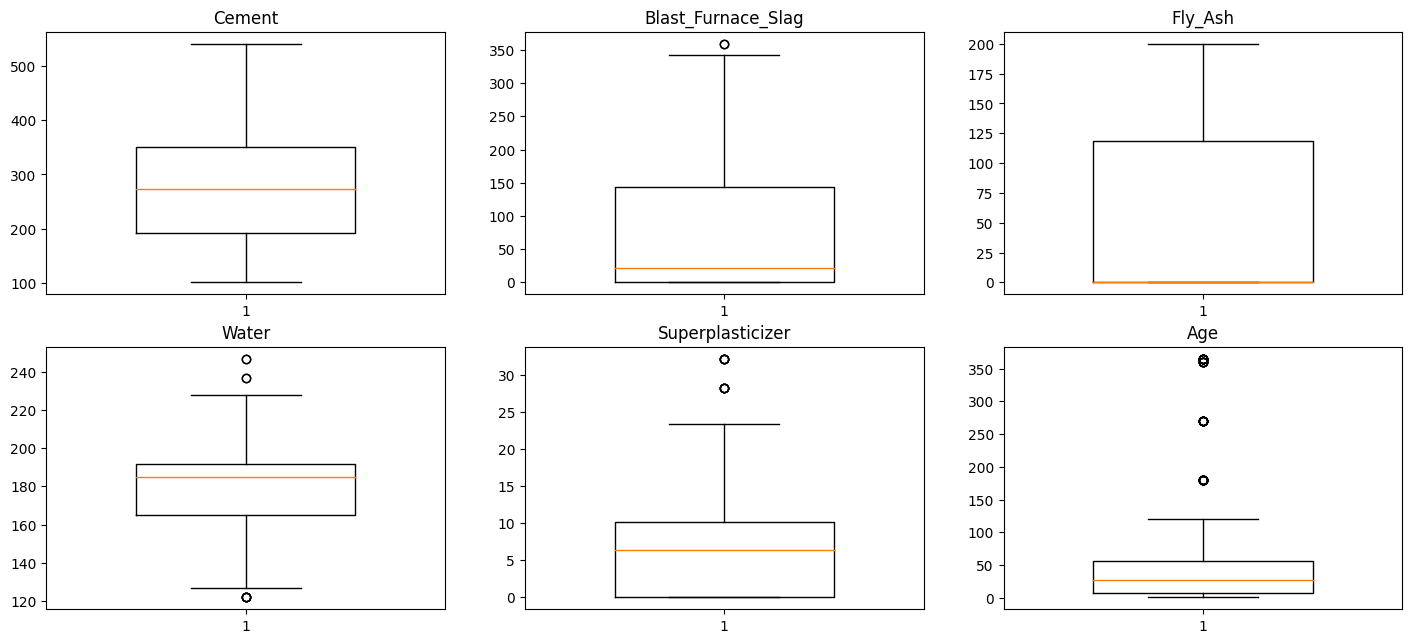

In [12]:
X = df.iloc[:,[0,1,2,3,4,7]]
plt.figure(figsize = (17.5,7.5))
plt.subplot(2,3,1)
plt.boxplot(df[X.columns[0]], widths = 0.55)
plt.title(X.columns[0])
plt.subplot(2,3,2)
plt.boxplot(df[X.columns[1]], widths = 0.55)
plt.title(X.columns[1])
plt.subplot(2,3,3)
plt.boxplot(df[X.columns[2]], widths = 0.55)
plt.title(X.columns[2])
plt.subplot(2,3,4)
plt.boxplot(df[X.columns[3]], widths = 0.55)
plt.title(X.columns[3])
plt.subplot(2,3,5)
plt.boxplot(df[X.columns[4]], widths = 0.55)
plt.title(X.columns[4])
plt.subplot(2,3,6)
plt.boxplot(df[X.columns[5]], widths = 0.55)
plt.title(X.columns[5])
plt.show()

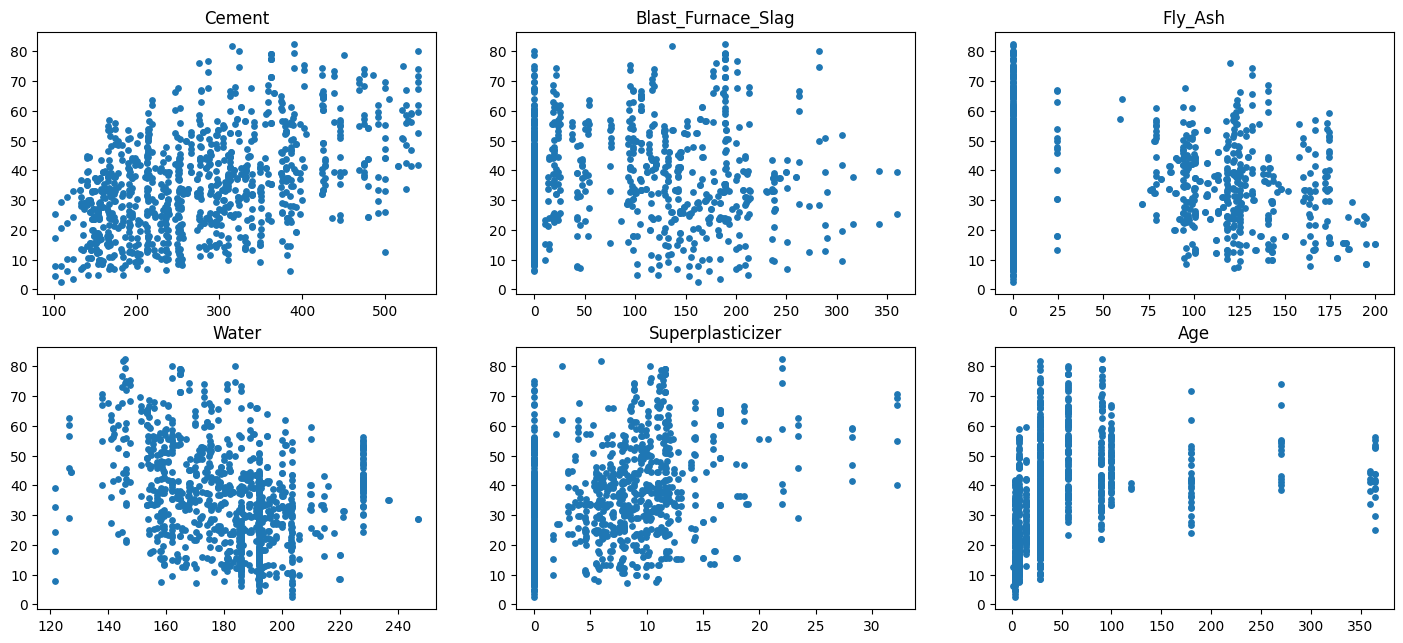

In [13]:
plt.figure(figsize = (17.5,7.5))
plt.subplot(2,3,1)
plt.scatter(df[X.columns[0]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[0])
plt.subplot(2,3,2)
plt.scatter(df[X.columns[1]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[1])
plt.subplot(2,3,3)
plt.scatter(df[X.columns[2]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[2])
plt.subplot(2,3,4)
plt.scatter(df[X.columns[3]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[3])
plt.subplot(2,3,5)
plt.scatter(df[X.columns[4]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[4])
plt.subplot(2,3,6)
plt.scatter(df[X.columns[5]], df["Concrete_Compressive_Strength"], s = 15)
plt.title(X.columns[5])
plt.show()

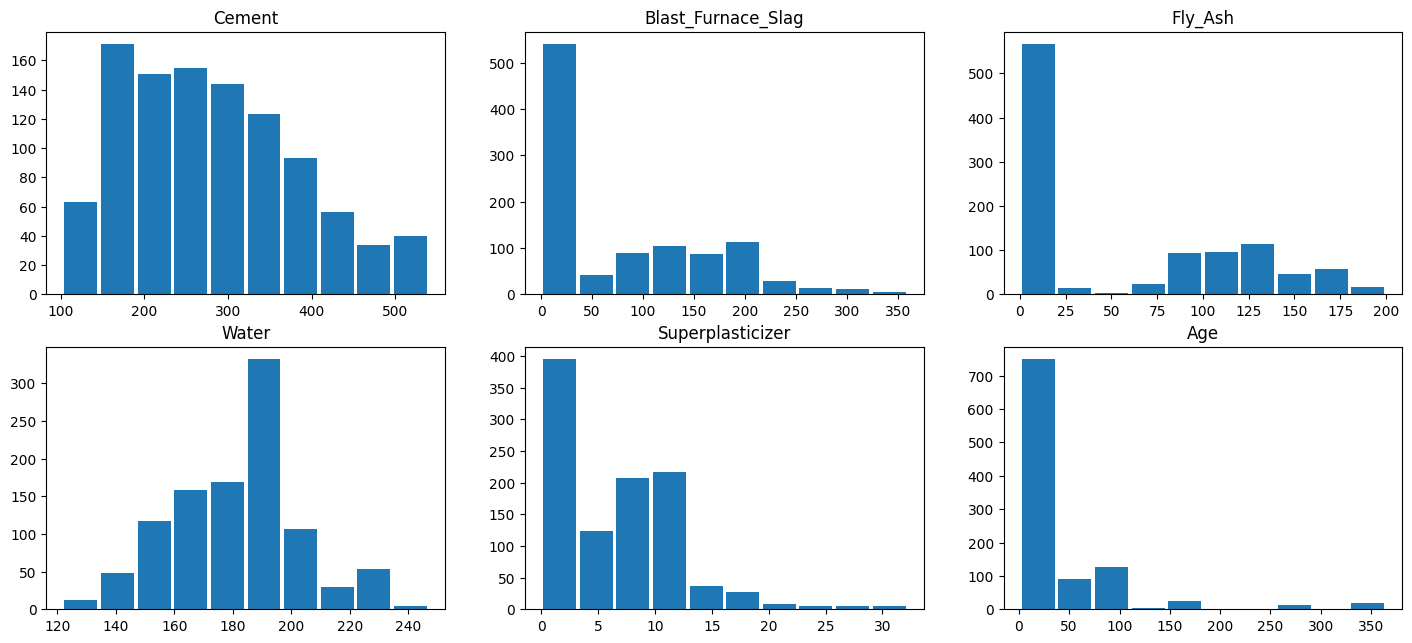

In [14]:
plt.figure(figsize = (17.5,7.5))
plt.subplot(2,3,1)
plt.hist(df[X.columns[0]], rwidth = 0.9)
plt.title(X.columns[0])
plt.subplot(2,3,2)
plt.hist(df[X.columns[1]],rwidth = 0.9)
plt.title(X.columns[1])
plt.subplot(2,3,3)
plt.hist(df[X.columns[2]],rwidth = 0.9)
plt.title(X.columns[2])
plt.subplot(2,3,4)
plt.hist(df[X.columns[3]],rwidth = 0.9)
plt.title(X.columns[3])
plt.subplot(2,3,5)
plt.hist(df[X.columns[4]],rwidth = 0.9)
plt.title(X.columns[4])
plt.subplot(2,3,6)
plt.hist(df[X.columns[5]],rwidth = 0.9)
plt.title(X.columns[5])
plt.show()

### Fitting a Linear Regression model to the complete data with no multicollinearity

In [15]:
# Multiple Linear Regression model
model4 = smf.ols('Concrete_Compressive_Strength ~ Blast_Furnace_Slag + Fly_Ash + Superplasticizer + Age', data=df).fit()
print(model4.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_Compressive_Strength   R-squared:                       0.354
Model:                                       OLS   Adj. R-squared:                  0.352
Method:                            Least Squares   F-statistic:                     140.7
Date:                           Fri, 18 Aug 2023   Prob (F-statistic):           7.33e-96
Time:                                   18:56:17   Log-Likelihood:                -4135.9
No. Observations:                           1030   AIC:                             8282.
Df Residuals:                               1025   BIC:                             8306.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [16]:
vif_data = pd.DataFrame()
vif_data["Predictors"] = df.iloc[:,[1,2,4,7]].columns
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:,[1,2,4,7]].values, i) 
                   for i in range(len(df.iloc[:,[1,2,4,7]].columns))]
vif_data

,Predictors,VIF
0,Blast_Furnace_Slag,1.445354
1,Fly_Ash,1.873064
2,Superplasticizer,2.289546
3,Age,1.203679


<br> </br>
**A few observatons from the summary of the new model**

- For the new model, the standard error for the intercept $\beta_{o}$ dropped from **4.213** to **0.9**, better approximation for $\beta_{o}$.
- The p-value for all the predictors is well below **0.05**, shows all the feautres contribute towards response.
- R squared value dropped from **0.614** to **0.354**, result of trading off valuable predictors with collinearity, might be due to less predictors hence have to check Adjusted R squared.
- Adjusted R value dropped from **0.612** to **0.352**, confirms losing on valuable predictors.
- F-statistic value dropped from **271.2** to **140.7**, shows decreased performance.
- Multicollinearity is no more!
<br> </br>

In [17]:
# Multiple Linear Regression model
model5 = smf.ols('Concrete_Compressive_Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Superplasticizer + Age',
                 data=df).fit()
print(model5.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_Compressive_Strength   R-squared:                       0.574
Model:                                       OLS   Adj. R-squared:                  0.572
Method:                            Least Squares   F-statistic:                     275.8
Date:                           Fri, 18 Aug 2023   Prob (F-statistic):          8.49e-187
Time:                                   18:56:17   Log-Likelihood:                -3922.0
No. Observations:                           1030   AIC:                             7856.
Df Residuals:                               1024   BIC:                             7886.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [18]:
vif_data = pd.DataFrame()
vif_data["Predictors"] = df.iloc[:,[0,1,2,4,7]].columns
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:,[0,1,2,4,7]].values, i) 
                   for i in range(len(df.iloc[:,[0,1,2,4,7]].columns))]
vif_data

,Predictors,VIF
0,Cement,2.819482
1,Blast_Furnace_Slag,1.526264
2,Fly_Ash,1.879115
3,Superplasticizer,2.921784
4,Age,1.550374


<br> </br>
**A few observatons from the summary of the Model 5**

- For the new model, the standard error for the intercept $\beta_{o}$ dropped from **4.213** to **1.706**, better approximation for $\beta_{o}$.
- The p-value for all the predictors is well below **0.05**, shows all the feautres contribute towards response.
- R squared value dropped from **0.614** to **0.574**, result of trading off valuable predictors with collinearity, might be due to less predictors hence have to check Adjusted R squared.
- Adjusted R value dropped from **0.612** to **0.572**, confirms losing on valuable predictors.
- F-statistic value increased from **271.2** to **275.8**, shows increased performance!
- Although StatModels summary shows Multicollinearity but all the VIF values are below 5!

**Hence, we will go by this model as there is negligible multicollinearity and better F- statistic, while R-squared and Adjusted R- squared as all the predictors were important.**
<br> </br>

### Correlation plot all the models

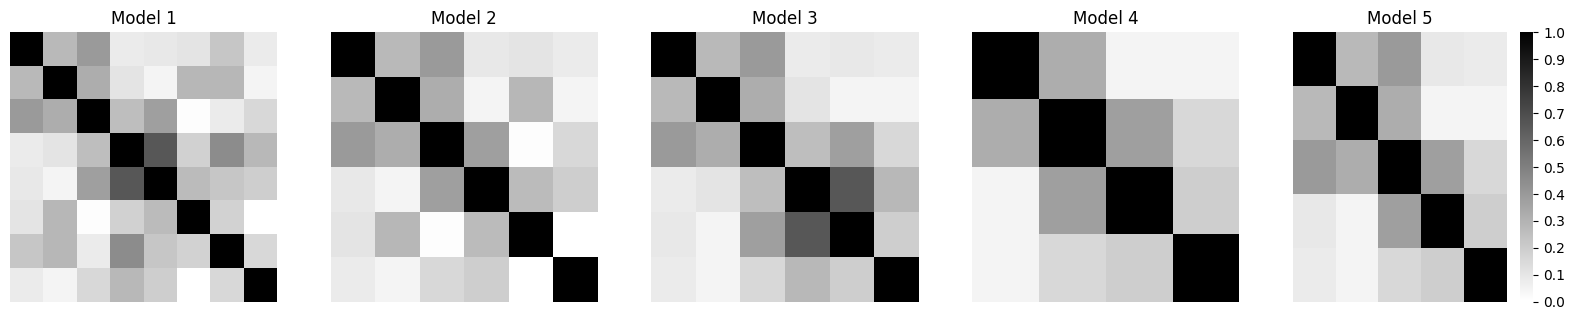

In [19]:
plt.figure(figsize = (20,3.5))
plt.subplot(1,5,1)
sns.heatmap(abs(df.iloc[:,0:8].corr()), cmap="binary", xticklabels= False, yticklabels=False, cbar = False,
            cbar_kws={'ticks': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}, vmin=0, vmax=1).set(title="Model 1")
plt.subplot(1,5,2)
sns.heatmap(abs(df.iloc[:,[0,1,2,4,5,7]].corr()), cmap="binary", xticklabels= False, yticklabels=False,  cbar = False,
           cbar_kws={'ticks': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}, vmin=0, vmax=1).set(title="Model 2")
plt.subplot(1,5,3)
sns.heatmap(abs(df.iloc[:,[0,1,2,3,4,7]].corr()), cmap="binary", xticklabels= False, yticklabels=False, cbar = False,
            cbar_kws={'ticks': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}, vmin=0, vmax=1).set(title="Model 3")
plt.subplot(1,5,4)
sns.heatmap(abs(df.iloc[:,[1,2,4,7]].corr()), cmap="binary", xticklabels= False, yticklabels=False, cbar = False,
           cbar_kws={'ticks': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}, vmin=0, vmax=1).set(title="Model 4")
plt.subplot(1,5,5)
sns.heatmap(abs(df.iloc[:,[0,1,2,4,7]].corr()), cmap="binary", xticklabels= False, yticklabels=False,
            cbar_kws={'ticks': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}, vmin=0, vmax=1).set(title="Model 5")
plt.show()

### Residual plot to check for heteroscedesticity

**Assumption of linear regression model is that error terms have constant variance, the hypothesis tests are based on this assumption.**

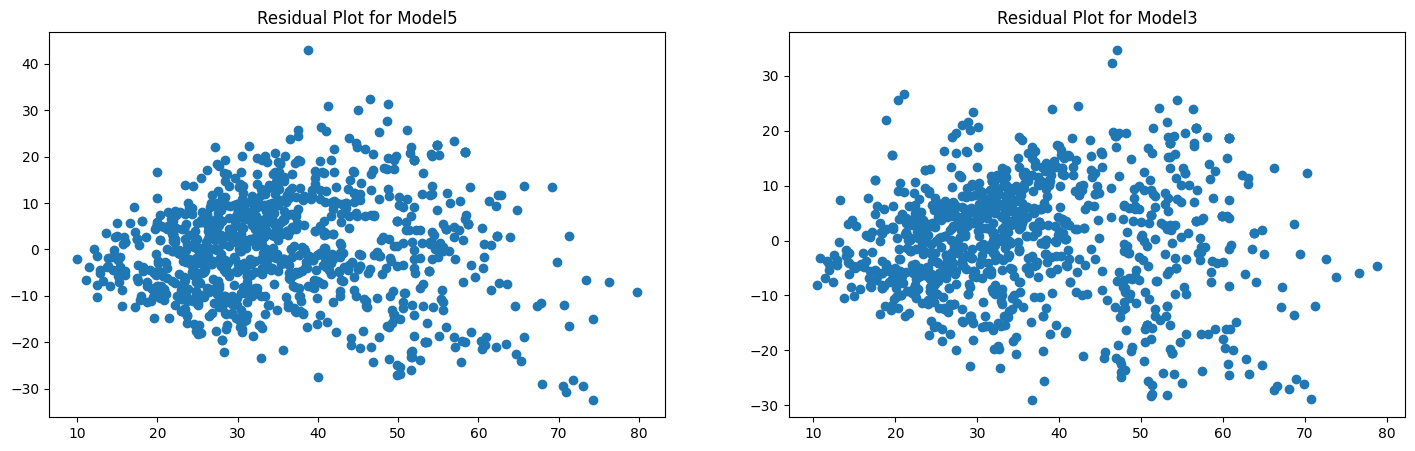

In [20]:
plt.figure(figsize = (17.5,5))
plt.subplot(1,2,1)
pred = model5.predict(df.iloc[:,[0,1,2,4,7]])
res = df["Concrete_Compressive_Strength"] - pred
plt.scatter(pred,res)
plt.title("Residual Plot for Model5")
plt.subplot(1,2,2)
pred = model3.predict(df.iloc[:,[0,1,2,3,4,7]])
res = df["Concrete_Compressive_Strength"] - pred
plt.scatter(pred,res)
plt.title("Residual Plot for Model3")
plt.show()

### Validation Set Approach for Linear Regression

Average test root mean squared error for linear regeression over 1000 iterations is 10.987.


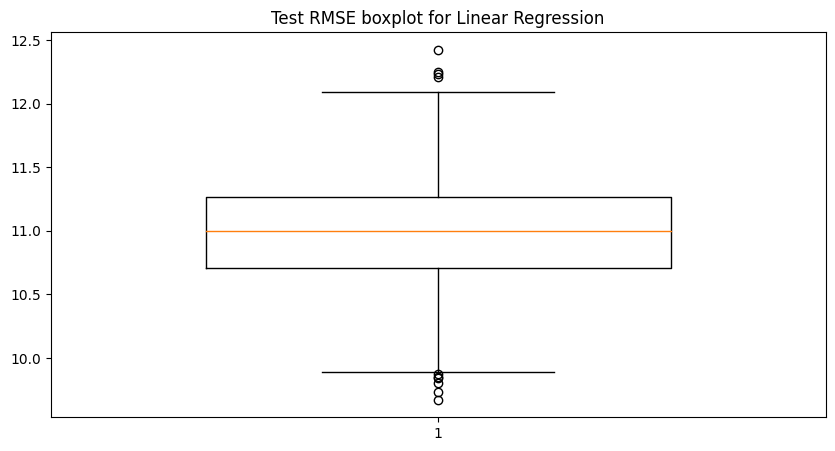

In [21]:
test = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
    model = smf.ols('Concrete_Compressive_Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Superplasticizer + Age',
    data=pd.concat([X_train,y_train], axis = 1)).fit()
    y_pred = list(model.predict(X_test))
    test.append(np.sqrt(mean_squared_error(y_pred, y_test)))
print(f"Average test root mean squared error for linear regeression over 1000 iterations is {round(np.mean(test),3)}.")
plt.figure(figsize = (10,5))
plt.boxplot(test, widths = 0.6)
plt.title("Test RMSE boxplot for Linear Regression")
plt.show()

### Selecting best k for k Nearest Neighbour Regression

In [22]:
# Standardization of data before applying kNN regression.
df_std = pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df.iloc[:,0:8]), columns = df.columns[0:8])
df_std = pd.concat([df_std,df.iloc[:,[8]]], axis = 1)

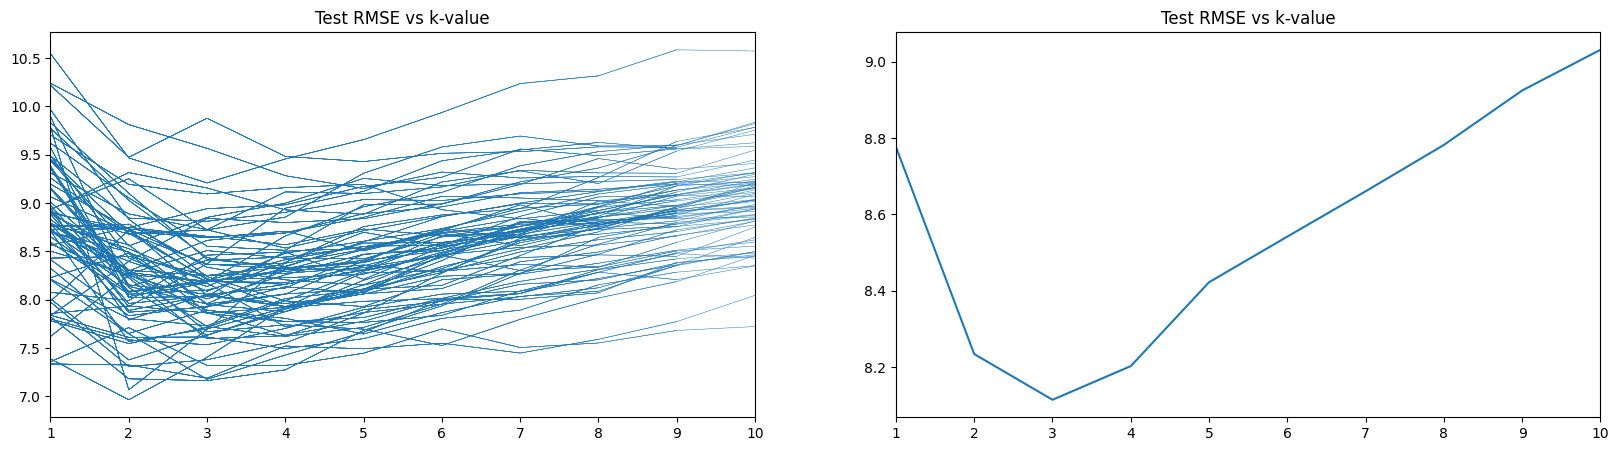

In [23]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Test RMSE vs k-value")
k_list = np.arange(1,11,1)
for i in range(75):
    knn_dict = {}
    X_train, X_test, y_train, y_test = train_test_split(
        df_std.iloc[:,[0,1,2,4,7]], df_std["Concrete_Compressive_Strength"], test_size=0.25)
    for i in k_list:
        knn = KNeighborsRegressor(n_neighbors=int(i))
        model_knn = knn.fit(X_train,y_train)
        y_knn_pred = model_knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test,y_knn_pred))
        knn_dict[i] = rmse
        plt.xlim(1,10)
        plt.plot(knn_dict.keys(), knn_dict.values(), lw = 0.35, c = "tab:blue")
plt.subplot(1,2,2)
plt.title("Test RMSE vs k-value")
test_acc=  []
for k in range(1,11):
    y_val = []
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:,[0,1,2,4,7]],
                                            df_std["Concrete_Compressive_Strength"], test_size=0.25);
        knn = KNeighborsRegressor(n_neighbors=int(k))
        model_knn = knn.fit(X_train,y_train)
        y_knn_pred = model_knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test,y_knn_pred))
        y_val.append(rmse)
    test_acc.append(np.mean(y_val))
plt.plot(range(1,11),test_acc)
plt.xlim(1,10)
plt.show()

**Least test root mean squared error is attained for k = 3, iterated over 1000 times.**

### Validation Set Approach for k Nearest Neighbour Regression

Average test root mean squared error for kNN regeression for k = 3 over 1000 iterations is 8.073.


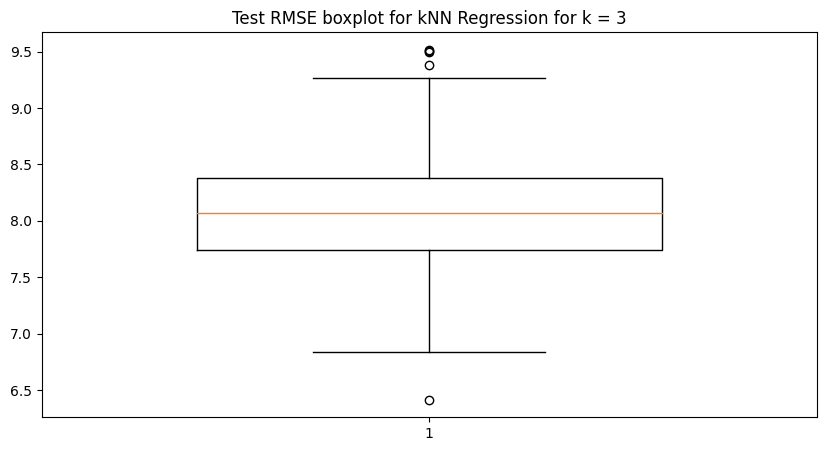

In [24]:
plt.figure(figsize = (10,5))
plt.title("Test RMSE boxplot for kNN Regression for k = 3")
test = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        df_std.iloc[:,[0,1,2,4,7]], df_std["Concrete_Compressive_Strength"], test_size=0.25)
    knn = KNeighborsRegressor(n_neighbors=3)
    model_knn = knn.fit(X_train,y_train)
    y_knn_pred = model_knn.predict(X_test)
    test.append(np.sqrt(mean_squared_error(y_test,y_knn_pred)))
print(f"Average test root mean squared error for kNN regeression for k = 3 over 1000 iterations is {round(np.mean(test),3)}.")
plt.boxplot(test, widths = 0.6)
plt.show()

### Selecting optimal max depth for Decision Tree Regression

In [25]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train RMSE vs max depth")
test_acc1=  []
for k in range(1,26):
    y_val = []
    for i in range(1000):
        reg = DecisionTreeRegressor(random_state=0, max_depth=k)
        reg.fit(df.iloc[:,[0,1,2,4,7]],df["Concrete_Compressive_Strength"])
        y_pred = reg.predict(df.iloc[:,[0,1,2,4,7]])
        rmse = np.sqrt(mean_squared_error(df["Concrete_Compressive_Strength"],y_pred))
        y_val.append(rmse)
    test_acc1.append(np.mean(y_val))
plt.plot(range(1,26),test_acc1)
plt.subplot(1,2,2)
plt.title("Test RMSE vs max depth")
test_acc2=  []
for k in range(1,26):
    y_val = []
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(
            df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
        reg = DecisionTreeRegressor(random_state=0, max_depth=k)
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        y_val.append(rmse)
    test_acc2.append(np.mean(y_val))
plt.plot(range(1,26),test_acc2)
plt.show()

**Optimal test root mean squared error is attained for max depth of 7, iterated over 1000 times.**

### Validation Set Approach for Decision Tree Regression

Test root mean squared error for decision tree with max depth 7, over 1000 iterations is 7.269.


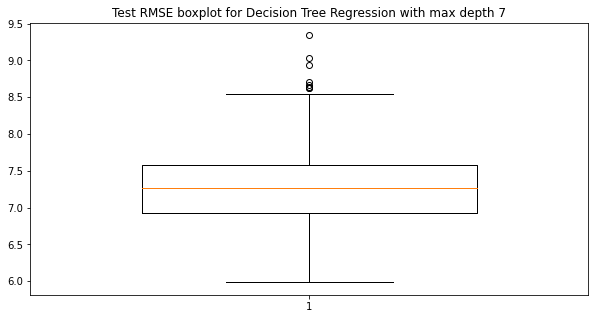

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Test RMSE boxplot for Decision Tree Regression with max depth 7")
test = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
    reg = DecisionTreeRegressor(random_state=0, max_depth=7)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
print(f"Test root mean squared error for decision tree with max depth 7, over 1000 iterations is {round(np.mean(test),3)}.")
plt.boxplot(test, widths = 0.6)
plt.show()

### Feature importance plot for Decision Tree Regression

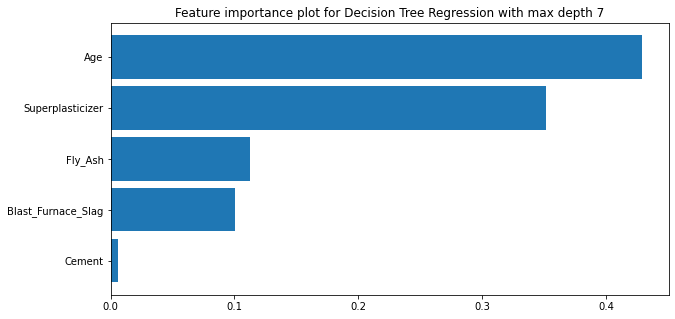

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Feature importance plot for Decision Tree Regression with max depth 7")
list1 = []
list2 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
    reg = DecisionTreeRegressor(max_depth=7)
    reg.fit(X_train, y_train)
    sorted_idx = reg.feature_importances_.argsort()
    list1.append(reg.feature_importances_[sorted_idx])
for j in range(5): 
    list2.append(np.mean([list[i][j] for i in range(10)]))    
plt.barh(df.iloc[:,[0,1,2,4,7]].columns, list2, height=0.85)
plt.show()

### Visualization of a decision tree with max depth 3

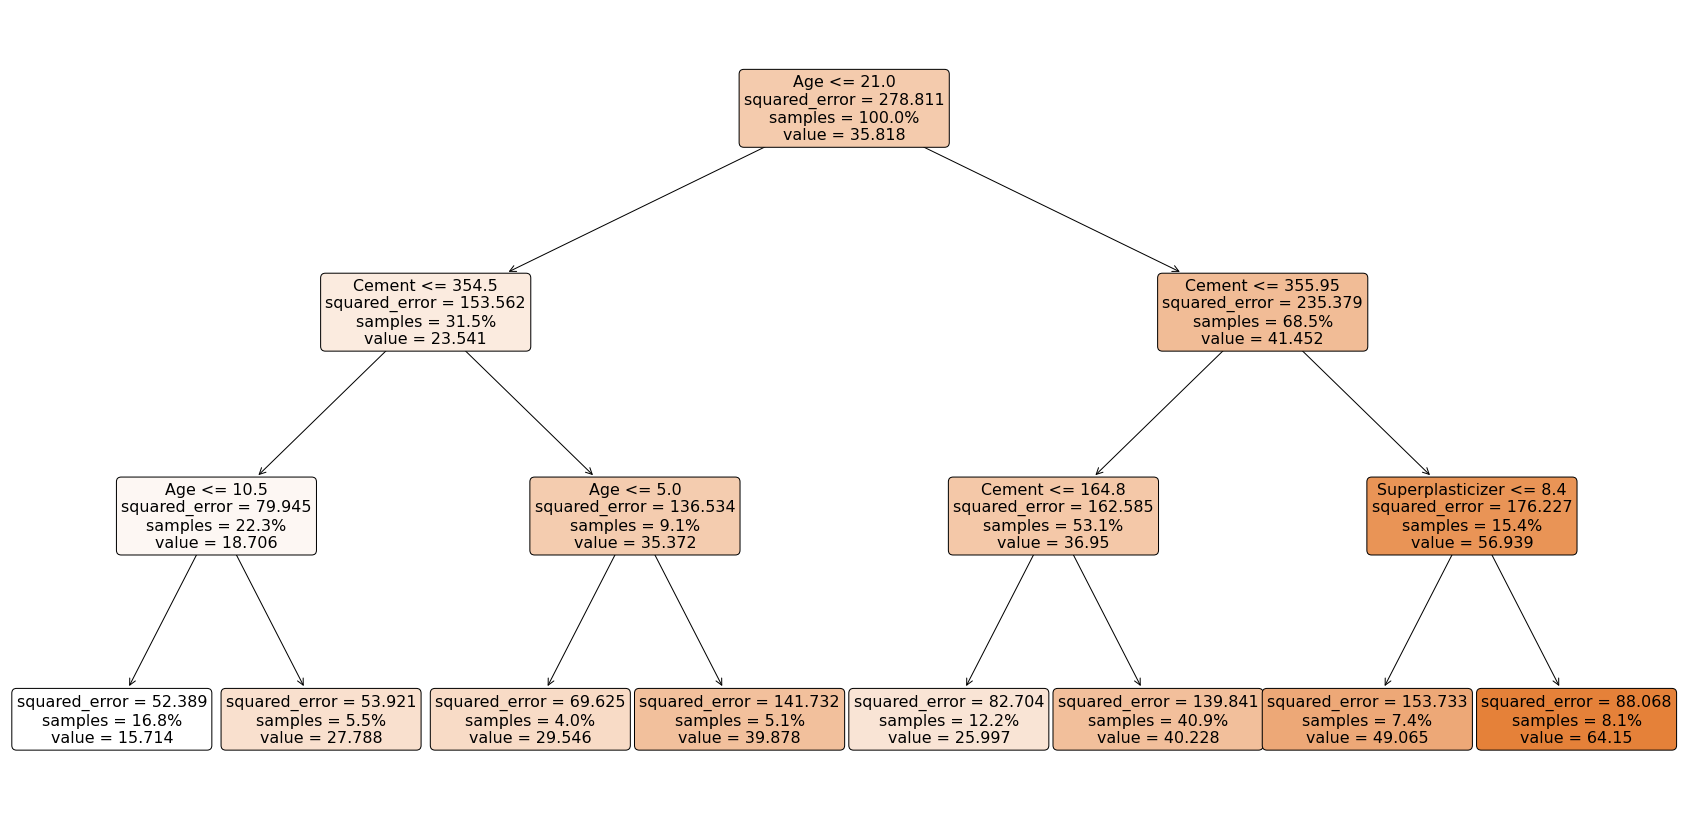

In [ ]:
reg = DecisionTreeRegressor(random_state=0, max_depth=3)
reg.fit(df.iloc[:,[0,1,2,4,7]],df["Concrete_Compressive_Strength"])
y_pred = reg.predict(df.iloc[:,[0,1,2,4,7]])
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(reg, feature_names=['Cement','Blast_Furnace_Slag','Fly_Ash', 'Superplasticizer', 'Age'], filled=True,
                  rounded = True, proportion = True)

### Selecting optimal max depth for Random Forest Regression

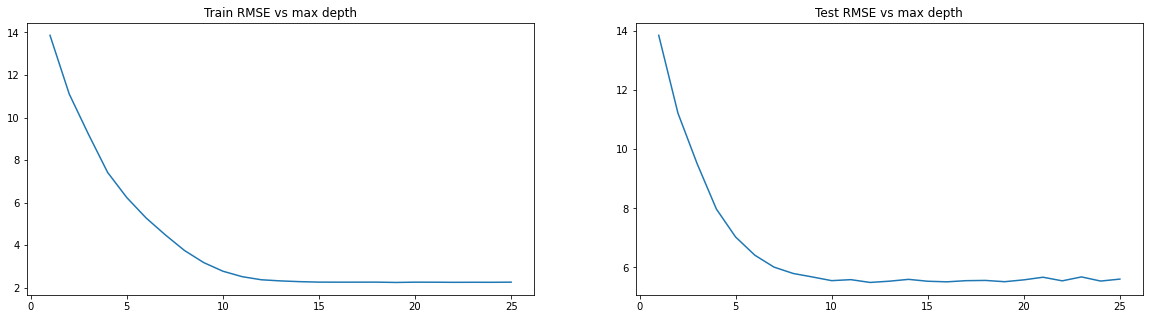

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train RMSE vs max depth")
test_acc1=  []
for k in range(1,26):
    y_val = []
    for i in range(20):
        reg_rf = RandomForestRegressor(max_depth=k)
        reg_rf.fit(df.iloc[:,[0,1,2,4,7]],df["Concrete_Compressive_Strength"])
        y_pred = reg_rf.predict(df.iloc[:,[0,1,2,4,7]])
        rmse = np.sqrt(mean_squared_error(df["Concrete_Compressive_Strength"],y_pred))
        y_val.append(rmse)
    test_acc1.append(np.mean(y_val))
plt.plot(range(1,26),test_acc1)
plt.subplot(1,2,2)
plt.title("Test RMSE vs max depth")
test_acc2=  []
for k in range(1,26):
    y_val = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(
            df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
        reg_rf = RandomForestRegressor(max_depth=k)
        reg_rf.fit(X_train,y_train)
        y_pred = reg_rf.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        y_val.append(rmse)
    test_acc2.append(np.mean(y_val))
plt.plot(range(1,26),test_acc2)
plt.show()

**Optimal test root mean squared error is attained for max depth of 9, iterated over 100 times.**

### Validation Set Approach for Random Forest Regression

Test root mean squared error for random forest with max depth 9, over 1000 iterations is 5.618.


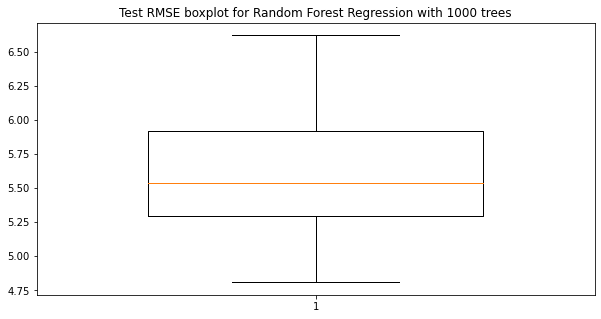

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Test RMSE boxplot for Random Forest Regression with 1000 trees")
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        df_std.iloc[:,[0,1,2,4,7]],df_std["Concrete_Compressive_Strength"], test_size=0.25)
    reg_rf = RandomForestRegressor(max_depth = 9)
    reg_rf.fit(X_train,y_train)
    y_pred = reg_rf.predict(X_test)
    test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
print(f"Test root mean squared error for random forest with max depth 9, over 1000 iterations is {round(np.mean(test),3)}.")
plt.boxplot(test, widths = 0.6)
plt.show()

### Selecting best parameters by hyperparameter tuning

In [ ]:
def param_tuning(X,y):
    param_grid = {"n_estimators" : [50,100,150,200,250,300,350,400], "max_features" : ["auto", "sqrt", "log2"],
                  "max_depth" : [3,4,5,6,7,8,9,10], "random_state" : [0]}

    grid = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1, verbose = 0)
    grid.fit(X,y)
    return grid.best_params_

In [ ]:
param_tuning(df.iloc[:,[0,1,2,4,7]],df["Concrete_Compressive_Strength"])

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 0}

Test root mean squared error for random forest with best parameters using hyperparameter tuning, over 1000 iterations is 5.84.


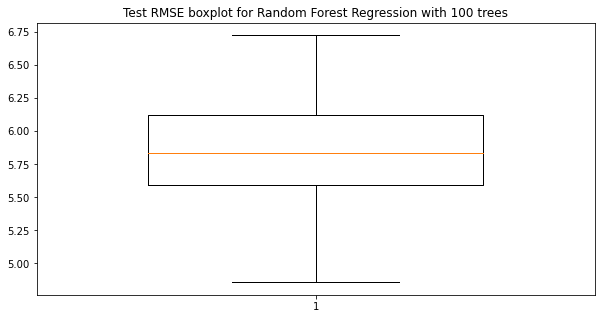

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Test RMSE boxplot for Random Forest Regression with 100 trees")
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        df_std.iloc[:,[0,1,2,4,7]],df_std["Concrete_Compressive_Strength"], test_size=0.25)
    reg_rf = RandomForestRegressor(random_state= 0, max_depth = 9, max_features =  'sqrt', n_estimators=  50)
    reg_rf.fit(X_train,y_train)
    y_pred = reg_rf.predict(X_test)
    test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
print(f"Test root mean squared error for random forest with best parameters using hyperparameter tuning, over 1000 iterations is {round(np.mean(test),3)}.")
plt.boxplot(test, widths = 0.6)
plt.show()

### Feature importance plot for Random Forest Regression

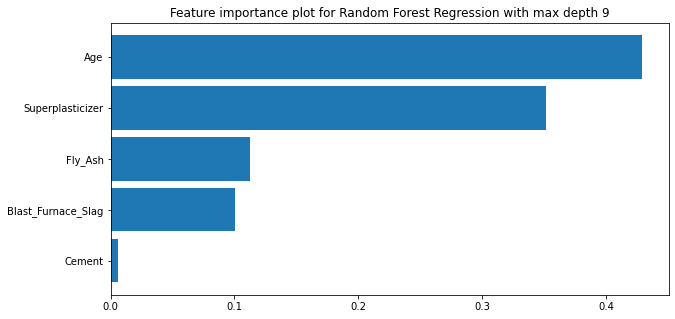

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Feature importance plot for Random Forest Regression with max depth 9")
list1 = []
list2 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        df.iloc[:,[0,1,2,4,7]], df["Concrete_Compressive_Strength"], test_size=0.25)
    reg_rf = RandomForestRegressor(max_depth=9)
    reg_rf.fit(X_train, y_train)
    sorted_idx = reg_rf.feature_importances_.argsort()
    list1.append(reg_rf.feature_importances_[sorted_idx])
for j in range(5): 
    list2.append(np.mean([list[i][j] for i in range(10)]))    
plt.barh(df.iloc[:,[0,1,2,4,7]].columns, list2, height=0.85)
plt.show()

In [ ]:
reg_rf = RandomForestRegressor(random_state= 0, max_depth = 9, max_features =  'sqrt', n_estimators=  50)
pipe = make_pipeline(reg_rf).fit(df.iloc[:,[0,1,2,4,7]],df["Concrete_Compressive_Strength"])

In [ ]:
pickle.dump(pipe, open("RFModel.pkl", "wb"))